In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv('Holiday_Package.csv') 
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [3]:
df.shape

(872, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [5]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

The unnmaed variable is of no use and we will remove it.

In [7]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [10]:
for column in df.columns:
    if df[column].dtype == 'int64':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

SALARY :  864
53846    1
51077    1
36800    1
36855    1
67573    1
        ..
44280    2
40270    2
46195    2
33357    2
39460    2
Name: Salary, Length: 864, dtype: int64


AGE :  43
62     3
61     8
20     8
22     9
60    10
53    10
23    11
21    12
52    13
59    14
54    14
58    16
24    16
55    17
25    17
57    18
56    18
30    19
29    19
27    19
48    20
37    21
43    21
50    21
51    22
45    23
49    23
42    24
46    24
26    24
39    25
47    26
41    26
32    27
36    28
38    28
40    29
28    29
33    30
35    31
34    32
31    32
44    35
Name: age, dtype: int64


EDUC :  20
1       1
21      1
18      1
19      2
17      3
2       6
16     10
3      11
15     15
6      21
14     25
7      31
13     43
4      50
5      67
10     90
11    100
9     114
12    124
8     157
Name: educ, dtype: int64


NO_YOUNG_CHILDREN :  4
3      5
2     55
1    147
0    665
Name: no_young_children, dtype: int64


NO_OLDER_CHILDREN :  7
6      2
5      2
4     14
3     55
1   

In [11]:
df.no_young_children.value_counts()

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [12]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups].head()

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


There are no duplicate values

In [13]:
df.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

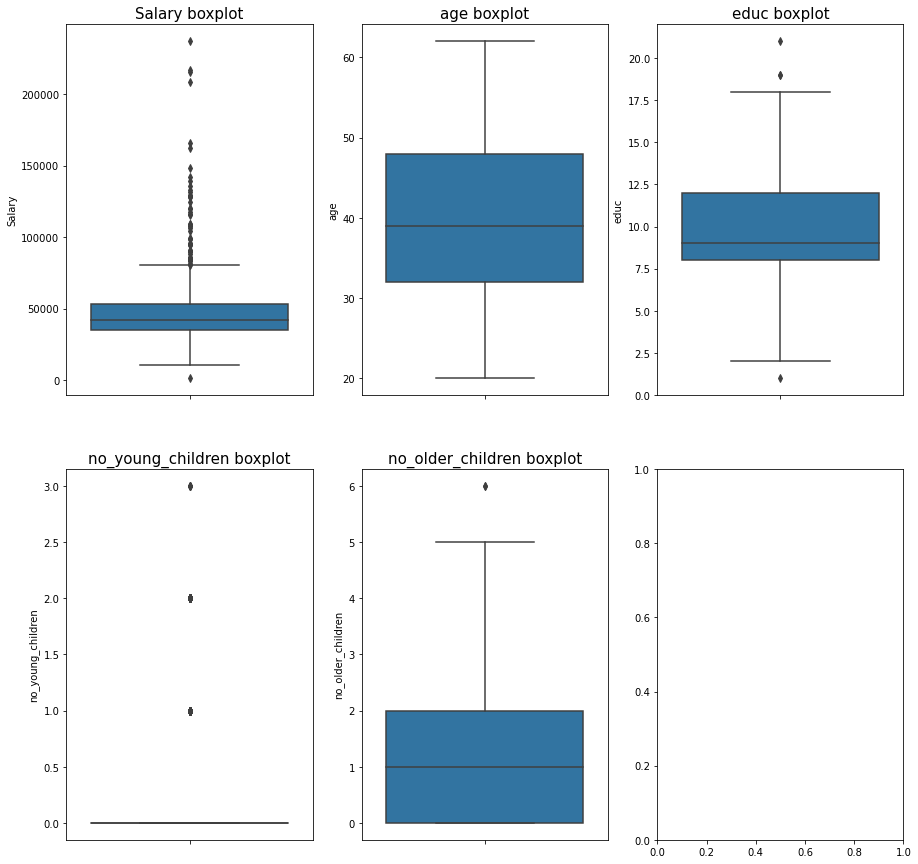

In [14]:
fig,axes = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(15,15)
a = sns.boxplot(data=df,x='Salary',orient='v',ax=axes[0][0])
a.set_title('Salary boxplot',fontsize=15);
b = sns.boxplot(data=df,x='age',orient='v',ax=axes[0][1])
b.set_title('age boxplot',fontsize=15);
c = sns.boxplot(data=df,x='educ',orient='v',ax=axes[0][2])
c.set_title('educ boxplot',fontsize=15);
d = sns.boxplot(data=df,x='no_young_children',orient='v',ax=axes[1][0])
d.set_title('no_young_children boxplot',fontsize=15);
e = sns.boxplot(data=df,x='no_older_children',orient='v',ax=axes[1][1])
e.set_title('no_older_children boxplot',fontsize=15);


<AxesSubplot:xlabel='no_young_children', ylabel='age'>

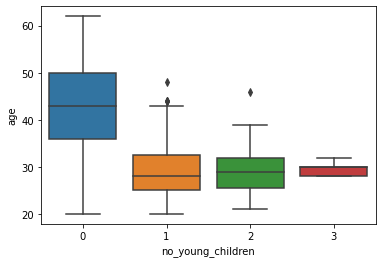

In [15]:
sns.boxplot(df['no_young_children'],df['age'])
# here we can see an outlier at 1 no of young children whenage of parent is 45 and 48 however we cannot say this can be an outlier
# may be they had a child at a late age. 

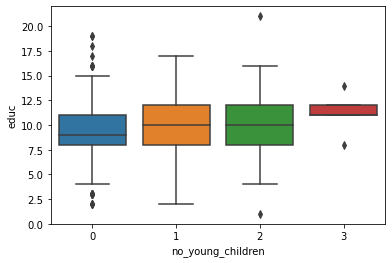

In [16]:
sns.boxplot(df['no_young_children'],df['educ']);


<AxesSubplot:xlabel='no_older_children', ylabel='age'>

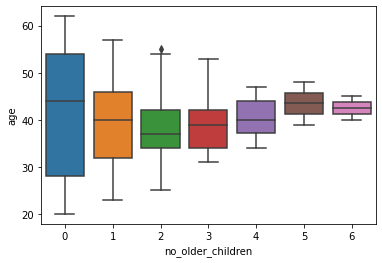

In [17]:
sns.boxplot(df['no_older_children'],df['age'])

<AxesSubplot:xlabel='age', ylabel='Salary'>

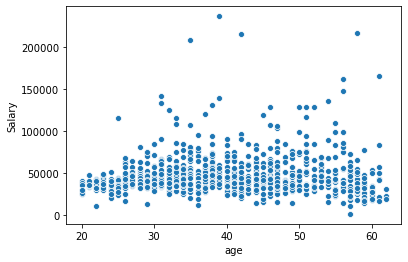

In [18]:
sns.scatterplot(df['age'],df['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='educ'>

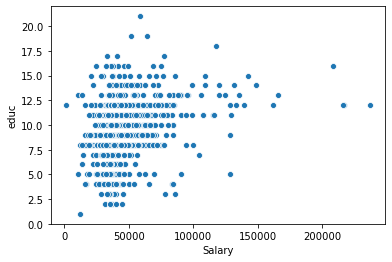

In [19]:
sns.scatterplot(x='Salary',y='educ',data=df)

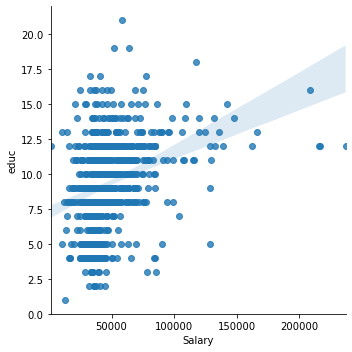

In [20]:
sns.lmplot(x='Salary',y='educ',data=df)

<AxesSubplot:xlabel='age', ylabel='educ'>

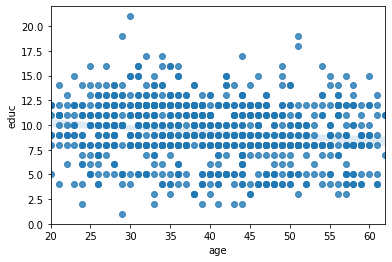

In [21]:
sns.regplot(x='age',y='educ',data=df)

<AxesSubplot:xlabel='age', ylabel='Salary'>

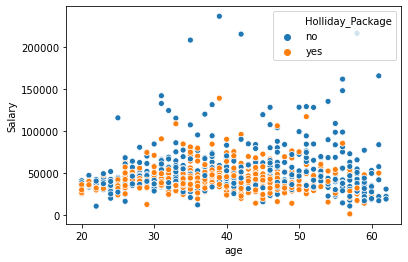

In [22]:
sns.scatterplot(x='age',y='Salary',data=df,hue='Holliday_Package') 
## People who earn less choose holiday packages than people who earn high. From the data we can see people earning upto 50000 take 
# more holiday package and those are between the age of 30 to 45.
# We can see a dip in people opting holiday package when the salary is above 50000.

<AxesSubplot:xlabel='educ', ylabel='Salary'>

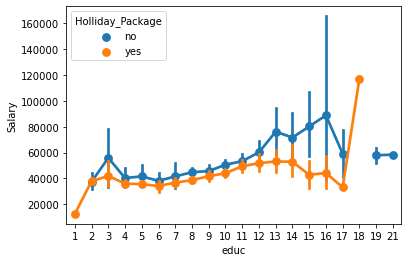

In [23]:
sns.pointplot(x='educ',y='Salary',data=df,hue='Holliday_Package')  

<AxesSubplot:xlabel='foreign', ylabel='Salary'>

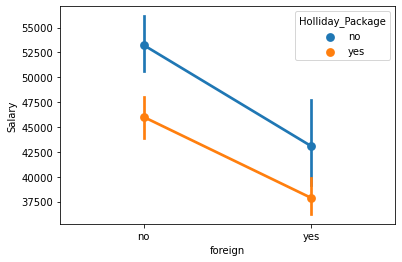

In [24]:
sns.pointplot(x='foreign',y='Salary',data=df,hue='Holliday_Package')  

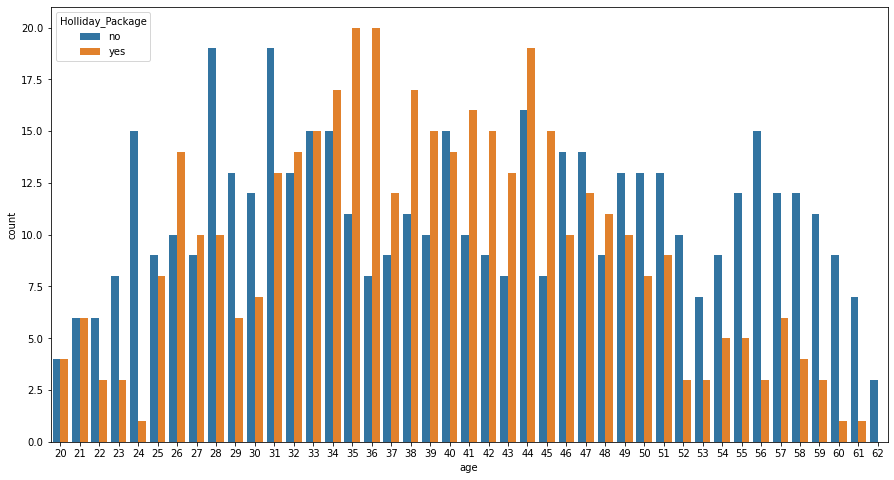

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(df['age'],hue=df['Holliday_Package']);

# this shows that people between 30 to 45 taken the maximum holiday packages. more young people choose to take the holiday package

In [26]:
df[['age','Holliday_Package']].groupby('Holliday_Package').mean()

# we can see the average age of people who are taking the holiday package are 38. As suggested by the above graph the people who are 
# of more age choose no holiday package. 

,age
Holliday_Package,
no,40.853503
yes,38.900249


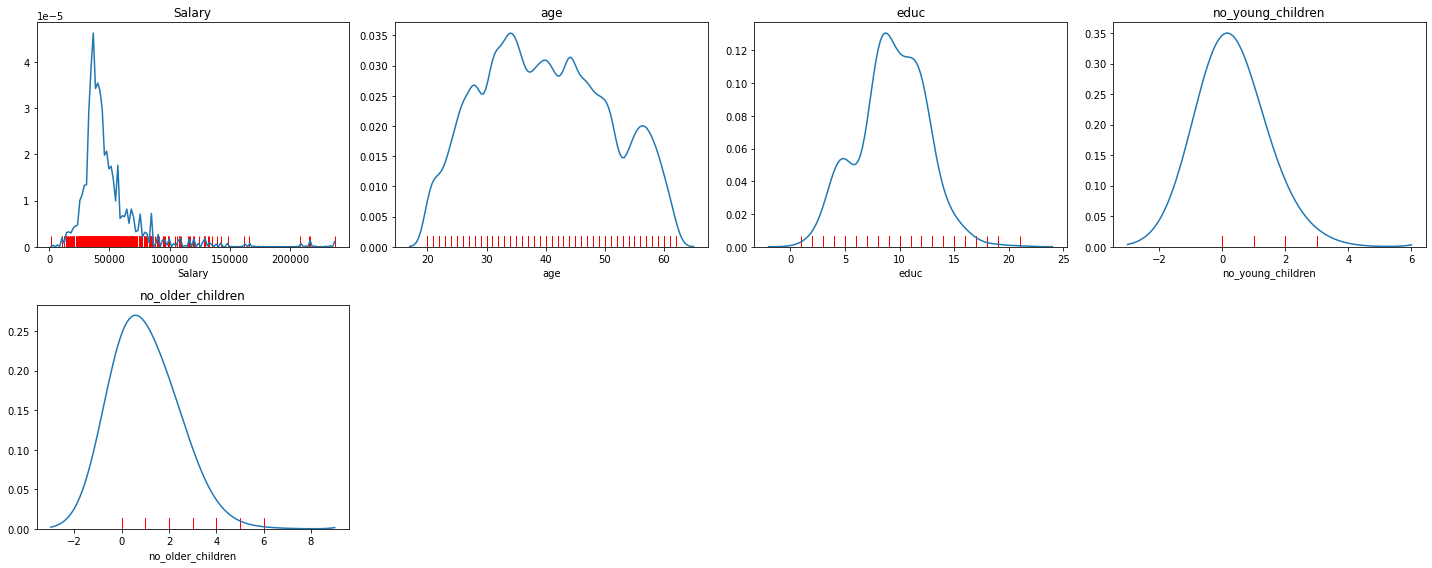

In [27]:
distrubution = df.drop(['Holliday_Package','foreign'],axis=1) 
data_plot=distrubution
fig=plt.figure(figsize=(20,8))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(2,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False,rug=True,rug_kws={'color':'r'},kde_kws={'bw':1})
    ax.set_title(data_plot.columns[i],color='Black')
plt.tight_layout()
plt.show()

In [28]:
df.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

In [29]:
df.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


<AxesSubplot:>

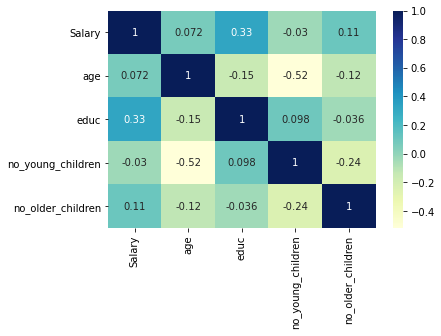

In [30]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

In [31]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')
        

Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64


foreign
no     656
yes    216
Name: foreign, dtype: int64




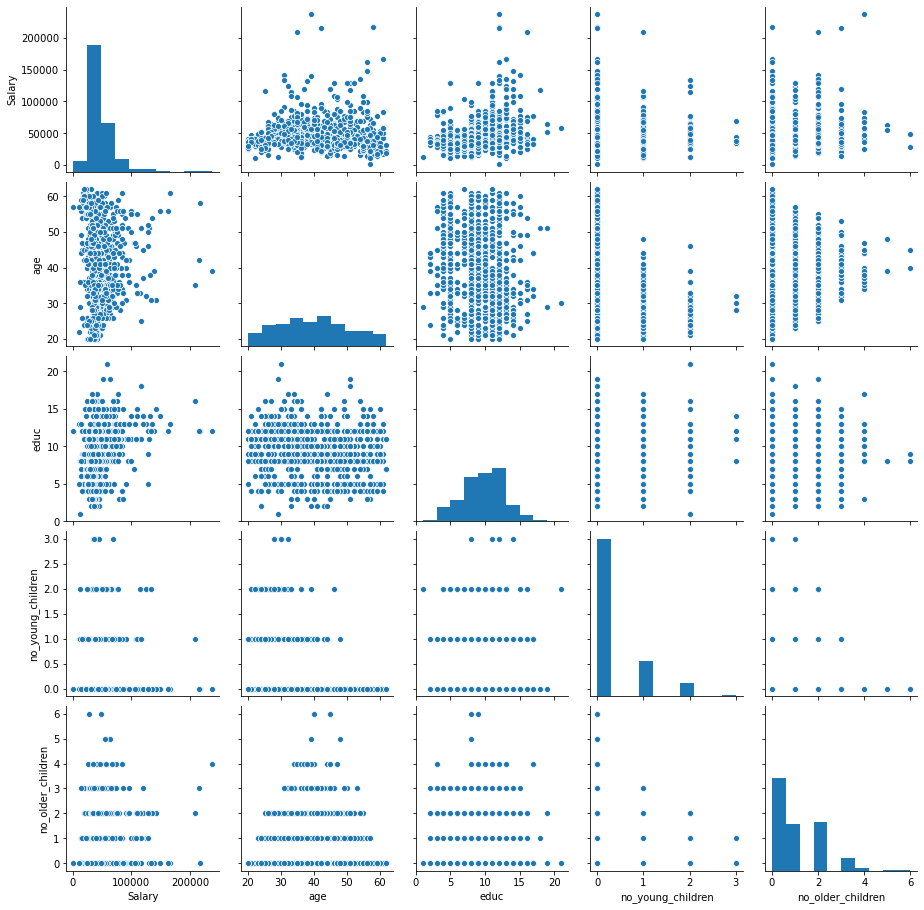

In [32]:
sns.pairplot(df,diag_kind='hist')

In [33]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [34]:
df.dtypes

Holliday_Package      int8
Salary               int64
age                  int64
educ                 int64
no_young_children    int64
no_older_children    int64
foreign               int8
dtype: object

In [35]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [36]:
X = df.drop('Holliday_Package', axis=1)
y = df['Holliday_Package']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [38]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [39]:
y_test.value_counts(1)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

In [40]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (610, 6)
X_test (262, 6)
y_train (610,)
y_test (262,)


In [41]:
grid={'penalty':['l1','l2','none','elasticnet'],
      'solver':['sag','lbfgs','newton-cg','saga'],
      'tol':[0.0001,0.00001]}

In [42]:
model = LogisticRegression(max_iter=100,n_jobs=2)

In [43]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-2,scoring='f1')

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=2, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-2,
             param_grid={'penalty': ['l1', 'l2', 'none', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'newton-cg', 'saga'],
                         'tol': [0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [45]:
best_model = grid_search.best_estimator_

In [46]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=2, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [47]:
logis_acc_train = best_model.score(X_train,y_train)
logis_acc_train

0.6672131147540984

In [48]:
logis_acc_test = best_model.score(X_test,y_test)
logis_acc_test

0.6526717557251909

In [49]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [50]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.685349,0.314651
1,0.539469,0.460531
2,0.697041,0.302959
3,0.496348,0.503652
4,0.557723,0.442277


In [51]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



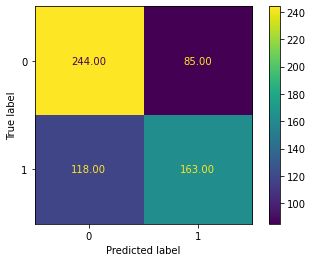

In [52]:
plot_confusion_matrix(best_model,X_train,y_train,values_format = '.2f')
print(classification_report(y_train, ytrain_predict),'\n');

In [53]:
confusion_matrix(y_test, ytest_predict)

array([[109,  33],
       [ 58,  62]], dtype=int64)

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



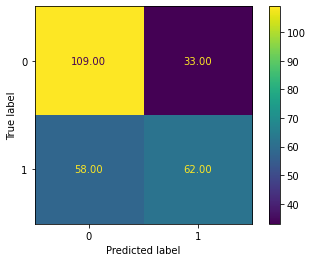

In [54]:
plot_confusion_matrix(best_model,X_test,y_test,values_format = '.2f');
print(classification_report(y_test, ytest_predict),'\n');

AUC: 0.735


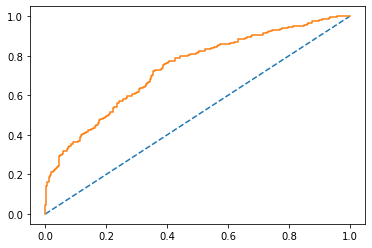

In [55]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logis_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logis_train_auc)
# calculate roc curve
logis_train_fpr, logis_train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logis_train_fpr, logis_train_tpr); 

AUC: 0.717


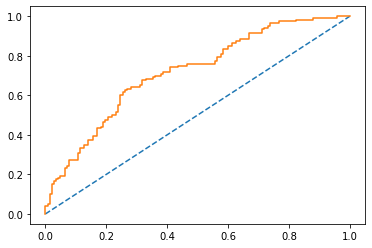

In [56]:
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logis_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logis_test_auc)
# calculate roc curve
logis_test_fpr, logis_test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logis_test_fpr, logis_test_tpr);

In [57]:
df1 = df.copy()

In [58]:
logis_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df1=pd.DataFrame(logis_metrics).transpose()
logis_train_precision=round(df1.loc["1"][0],2)
logis_train_recall=round(df1.loc["1"][1],2)
logis_train_f1=round(df1.loc["1"][2],2)
print ('logis_train_precision',logis_train_precision)
print ('logis_train_recall',logis_train_recall)
print ('logis_train_f1',logis_train_f1)

logis_train_precision 0.66
logis_train_recall 0.58
logis_train_f1 0.62


In [59]:
logis_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df1=pd.DataFrame(logis_metrics).transpose()
logis_test_precision=round(df1.loc["1"][0],2)
logis_test_recall=round(df1.loc["1"][1],2)
logis_test_f1=round(df1.loc["1"][2],2)
print ('logis_test_precision',logis_test_precision)
print ('logis_test_recall',logis_test_recall)
print ('logis_test_f1',logis_test_f1)

logis_test_precision 0.65
logis_test_recall 0.52
logis_test_f1 0.58


AUC for the Training Data: 0.735
AUC for the Test Data: 0.717


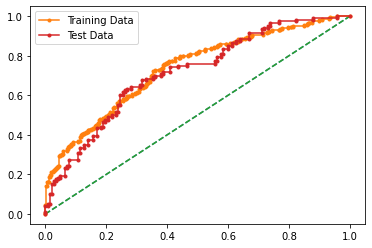

In [60]:
probs = best_model.predict_proba(X_train)
probs1 = best_model.predict_proba(X_test)
logis_train_auc = roc_auc_score(y_train,probs[:,1])
print('AUC for the Training Data: %.3f' % logis_train_auc)

logis_train_fpr,logis_train_tpr,thresholds = roc_curve(y_train, probs[:,1]) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(logis_train_fpr, logis_train_tpr, marker='.',label = 'Training Data')

logis_test_auc = roc_auc_score(y_test,probs1[:,1])
print('AUC for the Test Data: %.3f' % logis_test_auc)

logis_test_fpr, logis_test_tpr, thresholds = roc_curve(y_test, probs1[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(logis_test_fpr, logis_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# LDA

In [61]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [62]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [63]:
lda_train_acc = model.score(X_train,y_train)
lda_train_acc

0.6639344262295082

In [64]:
lda_test_acc = model.score(X_test,y_test)
lda_test_acc

0.6412213740458015

In [65]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 



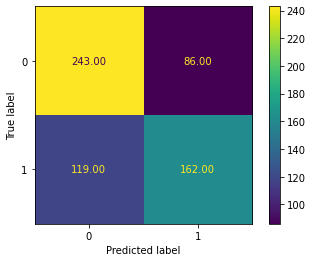

In [66]:
plot_confusion_matrix(model,X_train,y_train,values_format = '.2f')
print(classification_report(y_train, ytrain_predict),'\n');

In [67]:
confusion_matrix(y_test, ytest_predict)

array([[109,  33],
       [ 58,  62]], dtype=int64)

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



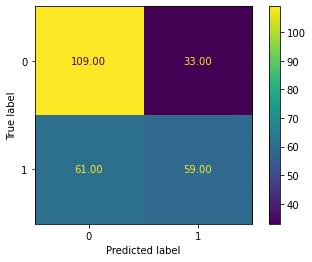

In [68]:
plot_confusion_matrix(model,X_test,y_test,values_format = '.2f')
print(classification_report(y_test, ytest_predict),'\n');

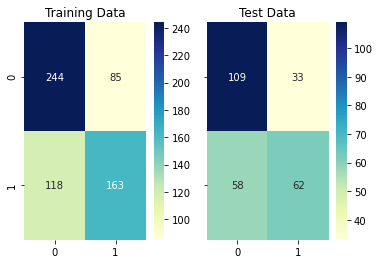

In [69]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='YlGnBu',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [70]:
ytrain_prob = model.predict_proba(X_train)
ytest_prob = model.predict_proba(X_test)

In [71]:
pd.DataFrame(ytest_prob).head()

,0,1
0,0.708475,0.291525
1,0.533448,0.466552
2,0.717871,0.282129
3,0.504865,0.495135
4,0.555863,0.444137


In [72]:
pd.DataFrame(ytrain_prob).head()

,0,1
0,0.261849,0.738151
1,0.710383,0.289617
2,0.617657,0.382343
3,0.235165,0.764835
4,0.533171,0.466829


AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


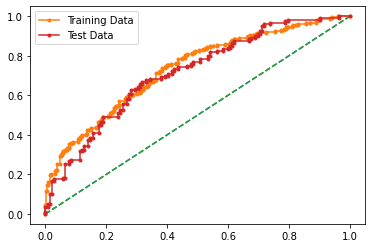

In [73]:
lda_train_auc = metrics.roc_auc_score(y_train,ytrain_prob[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

lda_train_fpr, lda_train_tpr, thresholds = metrics.roc_curve(y_train,ytrain_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lda_train_fpr, lda_train_tpr, marker='.',label = 'Training Data')

lda_test_auc = metrics.roc_auc_score(y_test,ytest_prob[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

lda_test_fpr, lda_test_tpr, thresholds = metrics.roc_curve(y_test,ytest_prob[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [74]:
lda_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df1=pd.DataFrame(lda_metrics).transpose()
lda_train_precision=round(df1.loc["1"][0],2)
lda_train_recall=round(df1.loc["1"][1],2)
lda_train_f1=round(df1.loc["1"][2],2)
print ('lda_train_precision',lda_train_precision)
print ('lda_train_recall',lda_train_recall)
print ('lda_train_f1',lda_train_f1)

lda_train_precision 0.66
lda_train_recall 0.58
lda_train_f1 0.62


In [75]:
lda_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df1=pd.DataFrame(lda_metrics).transpose()
lda_test_precision=round(df1.loc["1"][0],2)
lda_test_recall=round(df1.loc["1"][1],2)
lda_test_f1=round(df1.loc["1"][2],2)
print ('lda_test_precision',lda_test_precision)
print ('lda_test_recall',lda_test_recall)
print ('lda_test_f1',lda_test_f1)

lda_test_precision 0.65
lda_test_recall 0.52
lda_test_f1 0.58


0.1 

Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


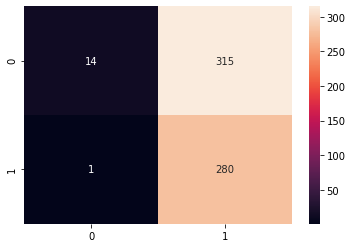

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


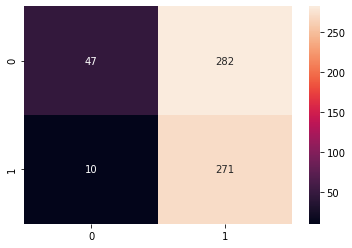

0.3 

Accuracy Score 0.5934
F1 Score 0.6693 

Confusion Matrix


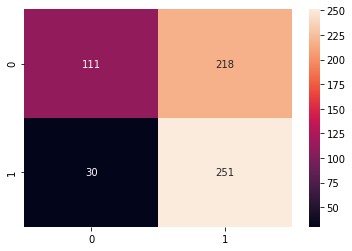

0.4 

Accuracy Score 0.6656
F1 Score 0.6762 

Confusion Matrix


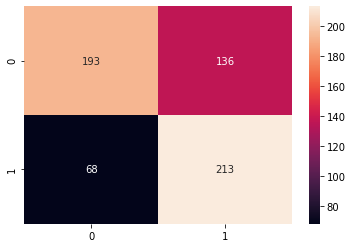

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

Confusion Matrix


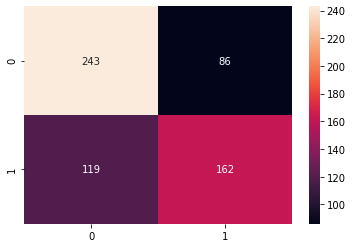

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

Confusion Matrix


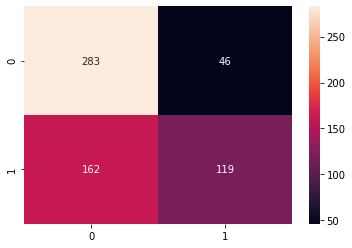

0.7 

Accuracy Score 0.6492
F1 Score 0.4398 

Confusion Matrix


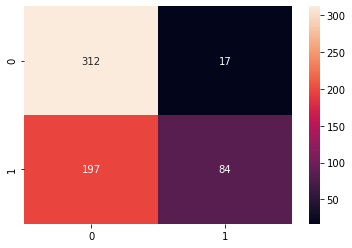

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


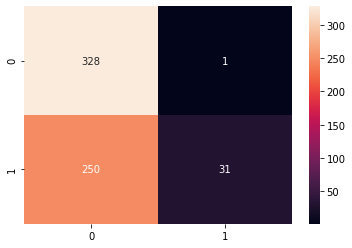

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


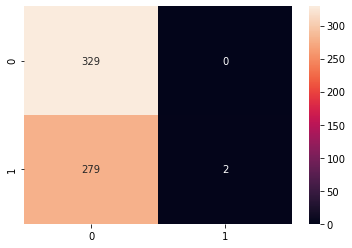

In [76]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(ytrain_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [77]:
data_pred_custom_cutoff=[]
for i in range(0,len(ytest_prob[:,1])):
    if np.array(ytest_prob[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

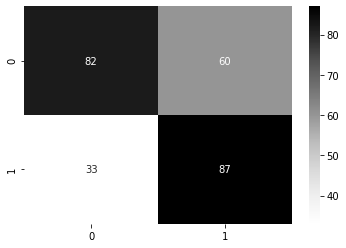

In [78]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [79]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')  

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.65      0.52      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.71      0.58      0.64       142
           1       0.59      0.72      0.65       120

    accuracy                           0.65       262
   macro avg       0.65      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262
 



In [80]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LOGISTICS TRAIN':[logis_acc_train,logis_train_auc,logis_train_recall,logis_train_precision,logis_train_f1],
                     'LOGISTICS Test':[logis_acc_test,logis_test_auc,logis_test_recall,logis_test_precision,logis_test_f1],
                    'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
                    'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
       
round(data,2)

,LOGISTICS TRAIN,LOGISTICS Test,LDA Train,LDA Test
Accuracy,0.67,0.65,0.66,0.64
AUC,0.74,0.72,0.73,0.71
Recall,0.58,0.52,0.58,0.52
Precision,0.66,0.65,0.66,0.65
F1 Score,0.62,0.58,0.62,0.58


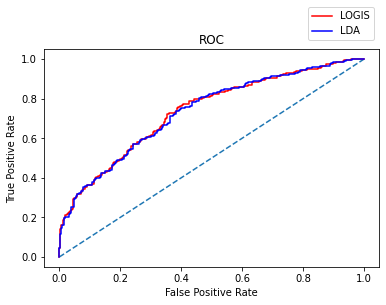

In [81]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logis_train_fpr, logis_train_tpr,color='red',label="LOGIS")
plt.plot(lda_train_fpr,lda_train_tpr,color='blue',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

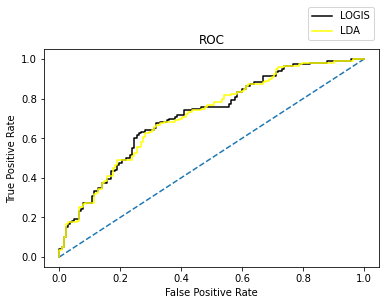

In [82]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logis_test_fpr, logis_test_tpr,color='black',label="LOGIS")
plt.plot(lda_test_fpr,lda_test_tpr,color='yellow',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [83]:
df2 = df.copy()

In [84]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [85]:
y_train_predict = pd.DataFrame(y_train_predict) 
y_test_predict = pd.DataFrame(y_test_predict)

In [86]:
df2['y_train_pred'] = pd.DataFrame(y_train_predict)
df2['y_test_pred'] = pd.DataFrame(y_test_predict)


In [87]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign,y_train_pred,y_test_pred
0,0,48412,30,8,1,1,0,1.0,0.0
1,1,37207,45,8,0,1,0,0.0,0.0
2,0,58022,46,9,0,0,0,0.0,0.0
3,0,66503,31,11,2,0,0,1.0,0.0
4,0,66734,44,12,0,2,0,0.0,0.0


In [88]:
df2.y_test_pred.value_counts()

0.0    170
1.0     92
Name: y_test_pred, dtype: int64

In [89]:
df2.y_train_pred.value_counts()

0.0    362
1.0    248
Name: y_train_pred, dtype: int64

In [90]:
yes_holiday = 92+248
Total_Holiday = 872 
predictedYes_for_holiday = yes_holiday/Total_Holiday*100
predictedYes_for_holiday


38.99082568807339

In [91]:
df3 = df2[['Holliday_Package','y_train_pred','y_test_pred']].groupby('Holliday_Package') 


In [92]:
df3.head()

,Holliday_Package,y_train_pred,y_test_pred
0,0,1.0,0.0
1,1,0.0,0.0
2,0,0.0,0.0
3,0,1.0,0.0
4,0,0.0,0.0
5,1,0.0,1.0
6,0,0.0,0.0
7,1,0.0,1.0
17,1,0.0,0.0
19,1,1.0,0.0


In [93]:
coef = model.coef_[0]
coef

array([-1.38030654e-05, -5.77948534e-02,  5.86043078e-02, -1.28279127e+00,
       -3.75672814e-02,  1.32060195e+00])

In [94]:
pd.DataFrame(coef, 
             X_test.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
foreign,1.320602
educ,0.058604
Salary,-0.000014
no_older_children,-0.037567
age,-0.057795
no_young_children,-1.282791
